In [ ]:
#TODO: Load data in batch for testing
#TODO: Merge two image folder
#TODO: Train new class cat


In [1]:
# The goal of this project is to used Image Classification to be able to identify the type of cat in a picture
# Aprroach: use Transfer Learning on pretrained model to speed up training process
# Pretrained Model: resnet50_v1d, resnet101_v1d_0.73
# Dataset: 

import matplotlib.pyplot as plt
import time
import mxnet as mx
import gluoncv

from mxnet import nd, gluon, init, autograd
from mxnet.gluon.data.vision import datasets, transforms


In [2]:
#Constant
DATA_PATH = "./data/images/"
SIAMESE_PATH = DATA_PATH + "siamese_cat/"

In [3]:
net = gluoncv.model_zoo.get_model('resnet50_v1d', pretrained=True)

In [4]:
transform_fn = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

In [5]:
import json

In [6]:
label_path = './cat_labels.json'
with open(label_path) as f:
    cat_labels = json.load(f)
classes = cat_labels

In [7]:
img_path = SIAMESE_PATH + 'image20.jpeg'
cat_img = mx.image.imread(img_path)

MXNetError: [20:21:41] src/io/image_io.cc:223: Check failed: file.is_open(): Imread: './data/images/siamese_cat/image20.jpeg' couldn't open file: No such file or directory
Stack trace:
  [bt] (0) 1   libmxnet.so                         0x000000010c107929 mxnet::op::NDArrayOpProp::~NDArrayOpProp() + 4473
  [bt] (1) 2   libmxnet.so                         0x000000010d6ad08d mxnet::io::Imread(nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray, std::__1::allocator<mxnet::NDArray> > const&, std::__1::vector<mxnet::NDArray, std::__1::allocator<mxnet::NDArray> >*) + 3197
  [bt] (2) 3   libmxnet.so                         0x000000010d6836ad mxnet::Imperative::Invoke(mxnet::Context const&, nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&) + 317
  [bt] (3) 4   libmxnet.so                         0x000000010d5c948e SetNDInputsOutputs(nnvm::Op const*, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> >*, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> >*, int, void* const*, int*, int, int, void***) + 1582
  [bt] (4) 5   libmxnet.so                         0x000000010d5ca1d0 MXImperativeInvokeEx + 176
  [bt] (5) 6   libffi.6.dylib                      0x0000000102282884 ffi_call_unix64 + 76



In [8]:
plt.imshow(cat_img.asnumpy())

NameError: name 'cat_img' is not defined

In [9]:
cat_img_transform = transform_fn(cat_img)
expand_img = cat_img_transform.expand_dims(axis=0)
pred = net(expand_img)

NameError: name 'cat_img' is not defined

In [10]:
idx = nd.argmax(pred, axis=1).astype('int')
string_index = str(idx.asscalar())

NameError: name 'pred' is not defined

In [11]:
print(classes[string_index])

NameError: name 'string_index' is not defined

In [18]:
#TODO: create a script to download image of these types of available cats
#--> Resolve by using Add-on download Image

In [19]:
#TODO: Rename cat images
#Load all of Siamese cat and test with pretrained_model
# Test with the pretrained model
# Add more cats to the model by using Transfer Learning



In [14]:
#Load and label siamese cat
#By default, folder is label 0, but siamese cat is labeled 284 in ImageNet

from mxnet.gluon.data.vision.datasets import ImageFolderDataset

training_path = "./data/images/new_cat/"
transform_label = lambda data, label: (data, nd.array([284]))
train_dataset = mx.gluon.data.vision.datasets.ImageFolderDataset(root=training_path, transform = transform_label)

In [15]:
#Confirm that the folder is siamese cat folder
sample = train_dataset[1]
t_img = transform_fn(sample[0])
img_expand = t_img.expand_dims(axis=0)
output = net(img_expand)


[285.]
<NDArray 1 @cpu(0)>


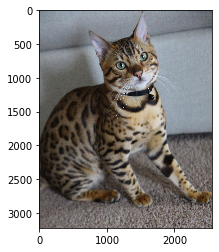

In [16]:
idx = nd.argmax(output, axis=1).astype('int')
print(nd.argmax(output, axis=1))
string_index = str(idx.asscalar())
#print(classes[string_index])
sample[0]
plt.imshow(sample[0].asnumpy())

In [17]:
#Check to see if there is any bad image in data

i = 0
while i < len(train_dataset):
    try:
        t = train_dataset[i]
        i += 1
    except ValueError:
        print(i)
        i += 1
        pass 


In [179]:
#Use this function to test everye image in the folder 
#to validate whether the images is labeled correctly
#and to test the accuracy of the model

#Return: acc, f_img
#false_images: return array of index of images which are not predicted correctly

def test(net, val_data, ctx):
    metric = mx.metric.Accuracy()
   
    false_images = []
    i = 0
    while i < len(val_data):
        data = val_data[i]
        img = data[0]
        label = data[1]
        t_img = transform_fn(img)
        img_expand = t_img.expand_dims(axis=0)
        outputs = net(img_expand)
        idx = nd.argmax(outputs, axis=1).astype('int')
        if (idx != label[0].astype('int')):
            false_images.append(i)
        metric.update(label, outputs)
        i += 1
    return metric.get(), false_images

In [180]:
#run the test
ctx = [mx.cpu()]
test_data = train_dataset
test_acc, false_images = test(net, test_data, ctx)

In [181]:
print(test_acc)

('accuracy', 1.0)


In [182]:
# used to display images
# Input: 
#  images: NDArray 
def show_images(images, num_rows, num_cols, scale):
    fig_size = (num_rows * scale, num_cols * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=fig_size)
    axes = axes.flatten()
    for (img, ax) in zip(images, axes):
        ax.imshow(img.asnumpy())

[]


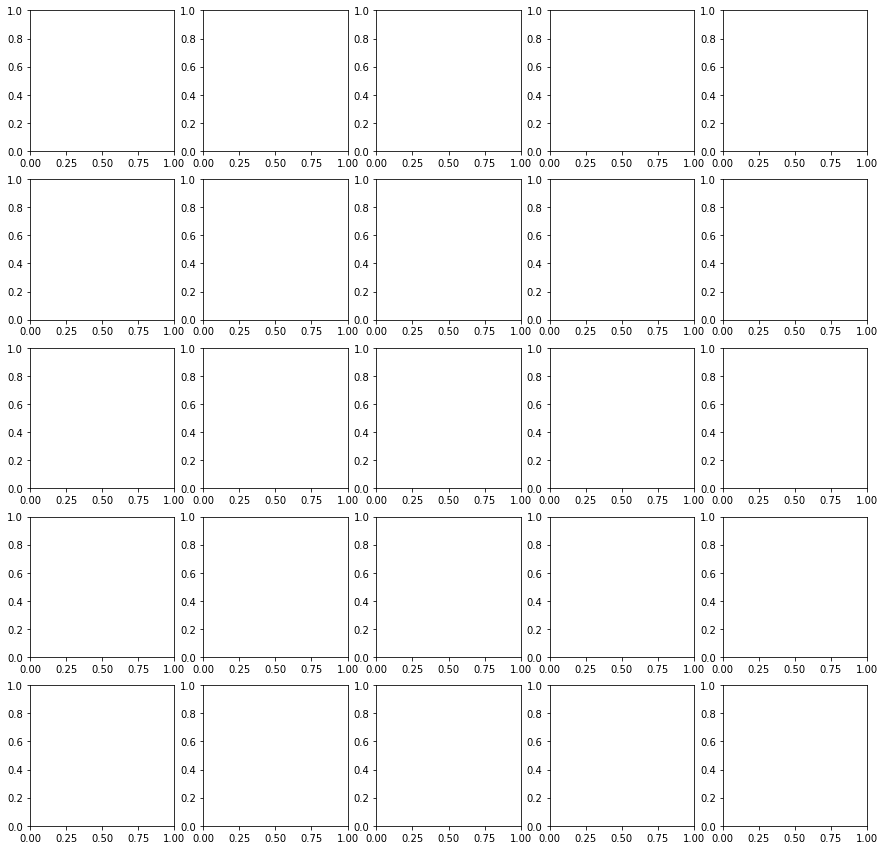

In [183]:
#Get the path name and array of bad images
img_paths = []
img_data = []
for i in false_images:
    img_paths.append(train_dataset.items[i])
    img_data.append(train_dataset[i][0])
print(img_paths)
show_images(img_data, 5, 5, 3)

In [174]:
# Remove them if necessary
# import os
# for path in img_paths:
#     os.remove(path[0])